In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB()
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [19]:
# Loading Data Set

from sklearn.datasets import load_digits
data = load_digits()

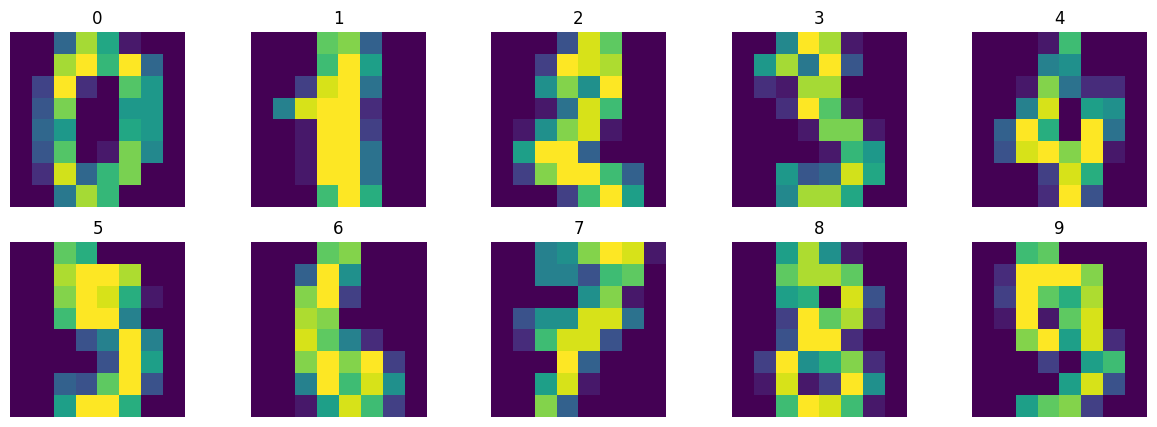

In [29]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(data.images[i])
    plt.title(data.target[i])
    plt.axis('off')

In [34]:
n_samples = len(data.images)
X = data.images.reshape((n_samples,-1))

In [38]:
print(len(data.images))
print(len(data.target))

1797
1797


In [35]:
 X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.33, random_state=42)

In [43]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1203, 594, 1203, 594)

# **Using SVC**
Display images and their corresponding predicted and actual labels using a Support Vector Classifier (SVC), we first need to train the SVC model on your data, then use it to predict the labels for your test set, and finally visualize the results

In [44]:
from sklearn.svm import SVC
svc = SVC(gamma=0.001)
svc.fit(X_train,y_train)

SVC(gamma=0.001)

Accuracy:  0.98989898989899
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  1  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  1]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  1  0 73  0  0  0  0]
 [ 0  0  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  0  0  1  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0  1  0 66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      0.98      0.99        56
           2       1.00      1.00      1.00        52
           3       0.96      0.98      0.97        55
           4       1.00      1.00      1.00        64
           5       1.00      0.99      0.99        74
           6       1.00      1.00      1.00        57
           7       0.98      0.98      0.98        62
           8       0.98      0.98      0.98        52
           9       0.97      0.99      0.98        67

    accuracy                           0.99  

<Axes: >

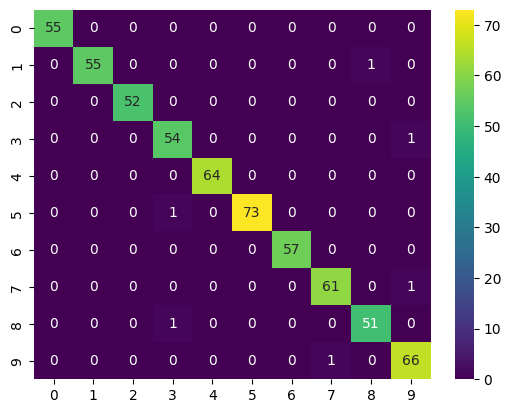

In [103]:
# ------------------ Prediction 
y_pred = svc.predict(X_test)

# --------------Print Accuracy
print('Accuracy: ',accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

# -------------------Plot heatmap
corr = confusion_matrix(y_pred,y_test)
sns.heatmap(corr,annot=True,cmap='viridis')

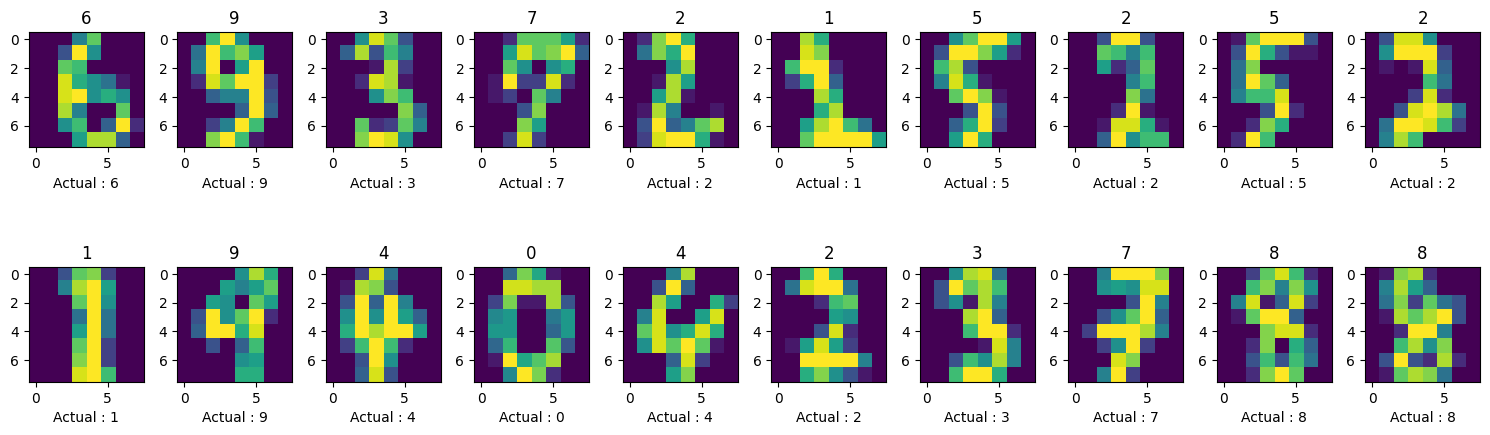

In [102]:
plt.figure(figsize=(15,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_test[i].reshape(8, 8))
    plt.title(y_pred[i])
    plt.xlabel(f'Actual : {y_test[i]}')
    
plt.tight_layout()
plt.show()

# **Using Naive Bayes**

Accuracy:  0.8888888888888888
[[54  0  0  0  1  0  0  0  0  0]
 [ 0 36  2  0  0  0  0  0  3  0]
 [ 0  7 48  1  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  0  1]
 [ 1  0  0  0 62  1  1  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  1]
 [ 0  1  0  0  0  1 55  0  0  0]
 [ 0  0  0  1  1  0  0 62  0  4]
 [ 0  6  2  4  0  0  1  0 49  3]
 [ 0  5  0  3  0 15  0  0  0 59]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.65      0.88      0.75        41
           2       0.92      0.86      0.89        56
           3       0.84      0.98      0.90        48
           4       0.97      0.95      0.96        65
           5       0.77      0.98      0.86        57
           6       0.96      0.96      0.96        57
           7       1.00      0.91      0.95        68
           8       0.94      0.75      0.84        65
           9       0.87      0.72      0.79        82

    accuracy                           0.89

<Axes: >

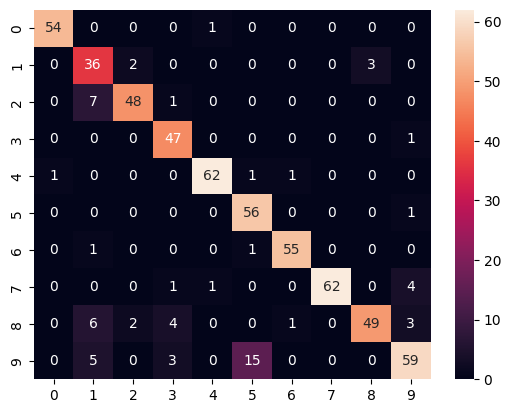

In [80]:
# ------------- Define Model

Multinomial = MultinomialNB()
Multinomial.fit(X_train,y_train)

# ------------------ Prediction 

y_pred = Multinomial.predict(X_test)

# --------------Print Accuracy

print('Accuracy: ',accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

# -------------------Plot heatmap

corr = confusion_matrix(y_pred,y_test)
sns.heatmap(corr,annot=True)

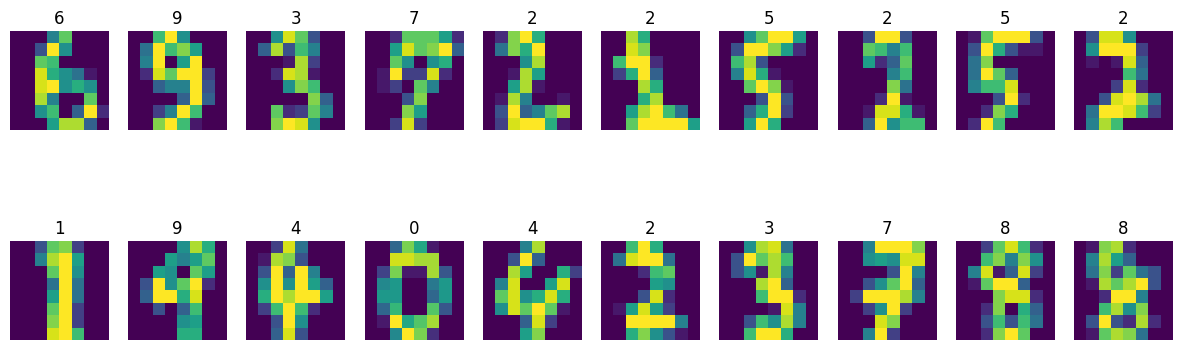

In [79]:
plt.figure(figsize=(15,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_test[i].reshape(8, 8))
    plt.title(y_pred[i])
    plt.xlabel(f'Actual : {y_test[i]}')
    
plt.tight_layout()
plt.show()

Accuracy:  0.8164983164983165
[[53  0  0  0  1  0  0  0  0  0]
 [ 0 35  2  0  0  0  0  0  1  1]
 [ 0  2 28  2  0  0  0  0  0  1]
 [ 0  0  0 39  0  0  0  0  1  1]
 [ 0  0  0  0 54  1  0  0  0  0]
 [ 1  2  4  3  0 65  2  1  0  5]
 [ 0  1  1  0  2  1 55  0  0  1]
 [ 1  3  0  0  7  5  0 61  2  7]
 [ 0  9 17  9  0  1  0  0 48  5]
 [ 0  3  0  3  0  0  0  0  0 47]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.64      0.90      0.74        39
           2       0.54      0.85      0.66        33
           3       0.70      0.95      0.80        41
           4       0.84      0.98      0.91        55
           5       0.89      0.78      0.83        83
           6       0.96      0.90      0.93        61
           7       0.98      0.71      0.82        86
           8       0.92      0.54      0.68        89
           9       0.69      0.89      0.78        53

    accuracy                           0.82

<Axes: >

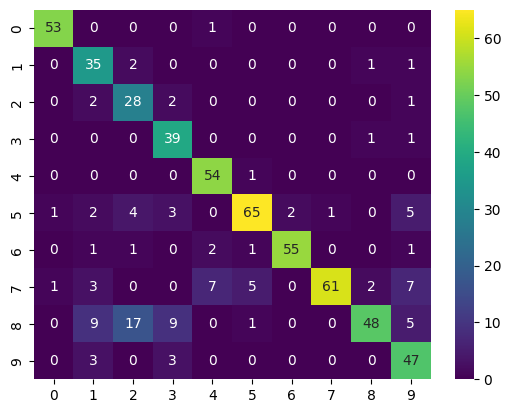

In [99]:
# ------------- Define Model

gaussian = GaussianNB()
gaussian.fit(X_train,y_train)

# ------------------ Prediction 

y_pred = gaussian.predict(X_test)

# --------------Print Accuracy

print('Accuracy: ',accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

# -------------------Plot heatmap

corr = confusion_matrix(y_pred,y_test)
sns.heatmap(corr,annot=True)

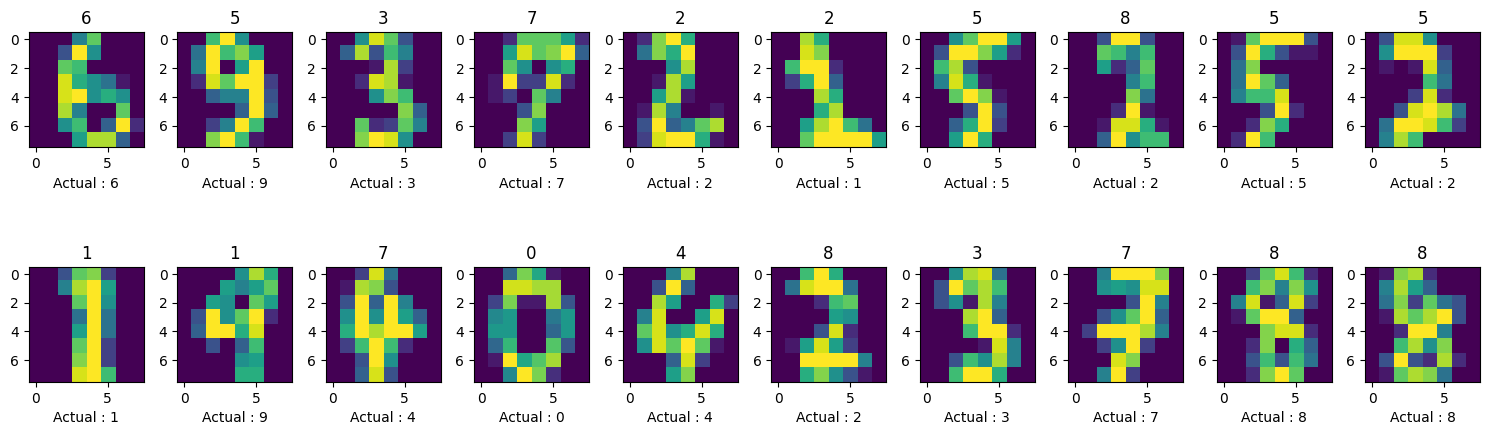

In [100]:
plt.figure(figsize=(15,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_test[i].reshape(8, 8))
    plt.title(y_pred[i])
    plt.xlabel(f'Actual : {y_test[i]}')
    
plt.tight_layout()
plt.show()